**FOREST COVER TYPE PREDICTION**

**Life Cycle Of ML Project**
<br>
* Understanding the problem statement <br>
* Data collection<br>
* Data cleaning <br>
* Exploratory data analysis (EDA) <br>
* Data pre-processing <br>
* Model training <br>
* Choose best model

**1. Understanding The Problem Statement**

* Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data.  Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data.  Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types).<br><br>
* This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado.  These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices. <br><br>
* Some background information for these four wilderness areas: Neota (area 2) probably has the highest mean elevational value of the 4 wilderness areas. Rawah (area 1) and Comanche Peak (area 3) would have a lower mean elevational value, while Cache la Poudre (area 4) would have the lowest mean elevational value.

**2. Data Collection**

* The Dataset collected from UCI Repository<br>
Link Of The Dataset - https://archive.ics.uci.edu/dataset/31/covertype

* Instances -
581012

* Features -
54

2.1 Import data and required packages

Import Packages

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Import Dataset

In [5]:
df = pd.read_csv("covtype.csv")
df.sample(1)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
321164,2759,63,5,95,13,417,225,229,139,2670,...,0,0,0,0,0,0,0,0,0,2


Check Data types of the attributes

In [6]:
df.dtypes

,0
Elevation,int64
Aspect,int64
Slope,int64
Horizontal_Distance_To_Hydrology,int64
Vertical_Distance_To_Hydrology,int64
Horizontal_Distance_To_Roadways,int64
Hillshade_9am,int64
Hillshade_Noon,int64
Hillshade_3pm,int64
Horizontal_Distance_To_Fire_Points,int64


**3. Data Cleaning**

Check statistics of the dataset

In [8]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


**Inferences** <br>
* Count is 581012 for each column so, no data point is missing <br>
* Some Column has constant Std devitation, so they can be removed <br>
* In this dataset Wildness_Area and Soil_type are one hot encoded. Hence, they could be converted back for some analysis <br>
* Scales are not same for all. Hence, rescaling may be necessary for some algorithms.  

* Remove unnecessary columns

In [9]:
df1 = df.copy()
remove_columns = []

#Those column's std is nearest zero, they do not help in prediction process
for col in df.columns:
  if df[col].std() <= 0.02:
    remove_columns.append(col)

#Drop the columns
df1.drop(remove_columns,axis=1,inplace=True)
print(remove_columns)

['Soil_Type7', 'Soil_Type8', 'Soil_Type15', 'Soil_Type36']


* Restoring the original values for better analysis <br>


Our Target variable is already one hot encoded now converting to the original values <br>
1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

In [14]:
df1["Cover_Type"] = df1["Cover_Type"].map({1:"Spruce/Fir",2:"Lodgepole Pine",3:"Ponderosa Pine",4:"Cottonwood/Willow",5:"Aspen",6:"Douglas-fir",7:"Krummholz"})

Replace the columns name with the original columns <br>


* "Wilderness_Area1": "Rawah_WA" <br>
* "Wilderness_Area2": "Neota_WA"
* "Wilderness_Area3": "Comanche_Peak_WA"
* "Wilderness_Area4": "Cache_la_Poudre_WA"
* "Horizontal_Distance_To_Hydrology": "HD_Hydrology"
* "Vertical_Distance_To_Hydrology": "VD_Hydrology"
* "Horizontal_Distance_To_Roadways": "HD_Roadways"
* "Horizontal_Distance_To_Fire_Points": "HD_Fire_Points"

In [18]:
df1 = df1.rename(columns={"Wilderness_Area1":"Rawah_WA","Wilderness_Area2":"Neota_WA",
"Wilderness_Area3":"Comanche_Peak_WA","Wilderness_Area4":"Cache_la_Poudre_WA","Horizontal_Distance_To_Hydrology":"HD_Hydrology",
"Vertical_Distance_To_Hydrology":"VD_Hydrology","Horizontal_Distance_To_Roadways":"HD_Roadways",
                               "Horizontal_Distance_To_Fire_Points":"HD_Fire_Points"})
df1.columns

Index(['Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hydrology',
       'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'HD_Fire_Points', 'Rawah_WA', 'Neota_WA', 'Comanche_Peak_WA',
       'Cache_la_Poudre_WA', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type'],
      dtype='object')

In [19]:
df2 = df1.copy()
df2['Wild Areas'] = (df2.iloc[:,10:15] == 1).idxmax(1)
df2['Soil types'] = (df2.iloc[:,15:55] == 1).idxmax(1)
df2['Wild Areas'].unique()

array(['Rawah_WA', 'Comanche_Peak_WA', 'Cache_la_Poudre_WA', 'Neota_WA'],
      dtype=object)

* Drop the column which are not required now

In [20]:
df2 = df2.drop(columns=['Rawah_WA', 'Neota_WA', 'Comanche_Peak_WA',
       'Cache_la_Poudre_WA', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'])

In [21]:
df = df2

In [24]:
df.sample(3)

,Elevation,Aspect,Slope,HD_Hydrology,VD_Hydrology,HD_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,HD_Fire_Points,Cover_Type,Wild Areas,Soil types
116243,2936,259,16,228,55,3930,180,247,205,816,Lodgepole Pine,Rawah_WA,Soil_Type29
567440,2910,101,16,342,105,2663,245,217,97,1390,Lodgepole Pine,Comanche_Peak_WA,Soil_Type10
360996,2546,120,14,339,55,872,243,228,111,1182,Ponderosa Pine,Comanche_Peak_WA,Soil_Type2


Show Top 5 Records

In [25]:
df.head()

,Elevation,Aspect,Slope,HD_Hydrology,VD_Hydrology,HD_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,HD_Fire_Points,Cover_Type,Wild Areas,Soil types
0,2596,51,3,258,0,510,221,232,148,6279,Aspen,Rawah_WA,Soil_Type29
1,2590,56,2,212,-6,390,220,235,151,6225,Aspen,Rawah_WA,Soil_Type29
2,2804,139,9,268,65,3180,234,238,135,6121,Lodgepole Pine,Rawah_WA,Soil_Type12
3,2785,155,18,242,118,3090,238,238,122,6211,Lodgepole Pine,Rawah_WA,Soil_Type30
4,2595,45,2,153,-1,391,220,234,150,6172,Aspen,Rawah_WA,Soil_Type29


Shape of the dataset

In [26]:
df.shape

(581012, 13)

Summary of the dataset

In [29]:
df.describe(include="all")

,Elevation,Aspect,Slope,HD_Hydrology,VD_Hydrology,HD_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,HD_Fire_Points,Cover_Type,Wild Areas,Soil types
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012,581012,581012
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,4,35
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lodgepole Pine,Rawah_WA,Soil_Type29
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283301,260796,115247
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,NaN,NaN,NaN
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,NaN,NaN,NaN
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,NaN,NaN,NaN
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,NaN,NaN,NaN
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,NaN,NaN,NaN


Feature Information
* **Elevation :** Elevation in meters.
* **Aspect :** Aspect in degrees azimuth.
* **Slope :** Slope in degrees
* **Horizontal_Distance_To_Hydrology :**  Horz Dist to nearest surface water features
* **Vertical_Distance_To_Hydrology :** Vert Dist to nearest surface water features
* **Horizontal_Distance_To_Roadways :**Horz Dist to nearest roadway
* **Hillshade_9am (0 to 255 index):** Hillshade index at 9am, summer solstice.
* **Hillshade_Noon (0 to 255 index):**  Hillshade index at noon, summer solstice.
* **Hillshade_3pm (0 to 255 index) :**  Hillshade index at 3pm, summer solstice
* **Horizontal_Distance_To_Fire_Point :** Horz Dist to nearest wildfire ignition points
* **Wilderness_Area (4 binary columns, 0 = absence or 1 = presence)  :**Wilderness area designation
* **Soil_Type (40 binary columns, 0 = absence or 1 = presence):** Soil Type designation
* **Cover_Type (7 types, integers 1 to 7) :**  Forest Cover Type designation (target).

**4. Exploratory data analysis (EDA)**

* Define Numerical and Categorical features

In [36]:
numerical_features = []
categorical_features = []

for i in df.columns:
  if df[i].dtype == "O":
    categorical_features.append(i)
  else:
    numerical_features.append(i)

print(f"We have {len(numerical_features)} numerical features, those are: {numerical_features}")
print(f"We have {len(categorical_features)} categorical features, those are: {categorical_features}")

We have 10 numerical features, those are: ['Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hydrology', 'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'HD_Fire_Points']
We have 3 categorical features, those are: ['Cover_Type', 'Wild Areas', 'Soil types']


* Univariate Analysis

The term univariate analysis refers to the analysis of one variable, prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

For Numerical Features

**A kernel density estimate (KDE)** :  plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

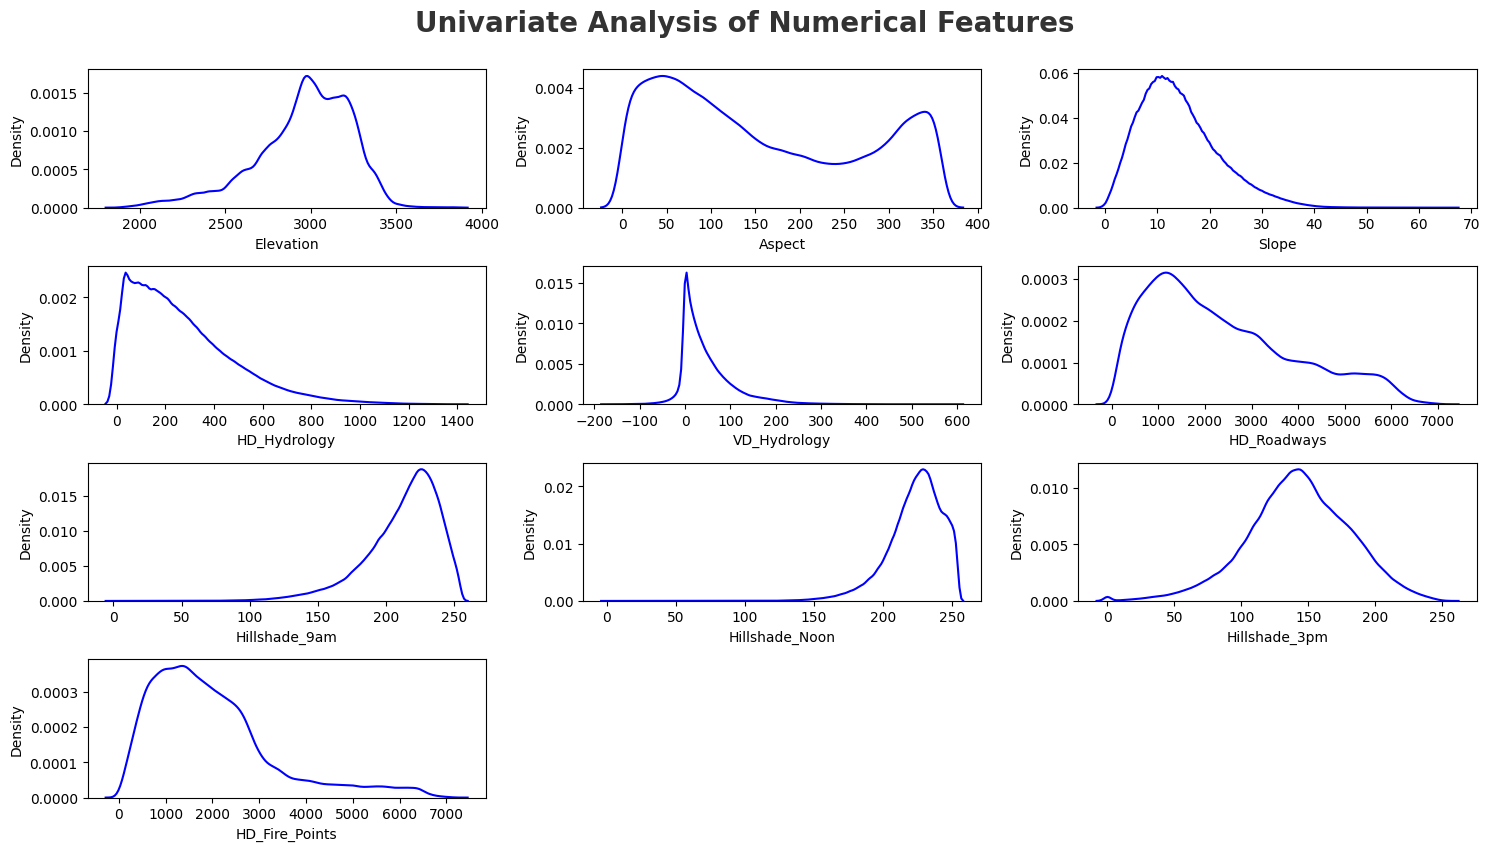

In [39]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]], color='blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

For Categorical Features

**Count plot** : is a visualization used to display the frequency distribution of a categorical variable. It presents the count of observations for each category as bars, making it a specialized form of a bar plot or a histogram for categorical data.

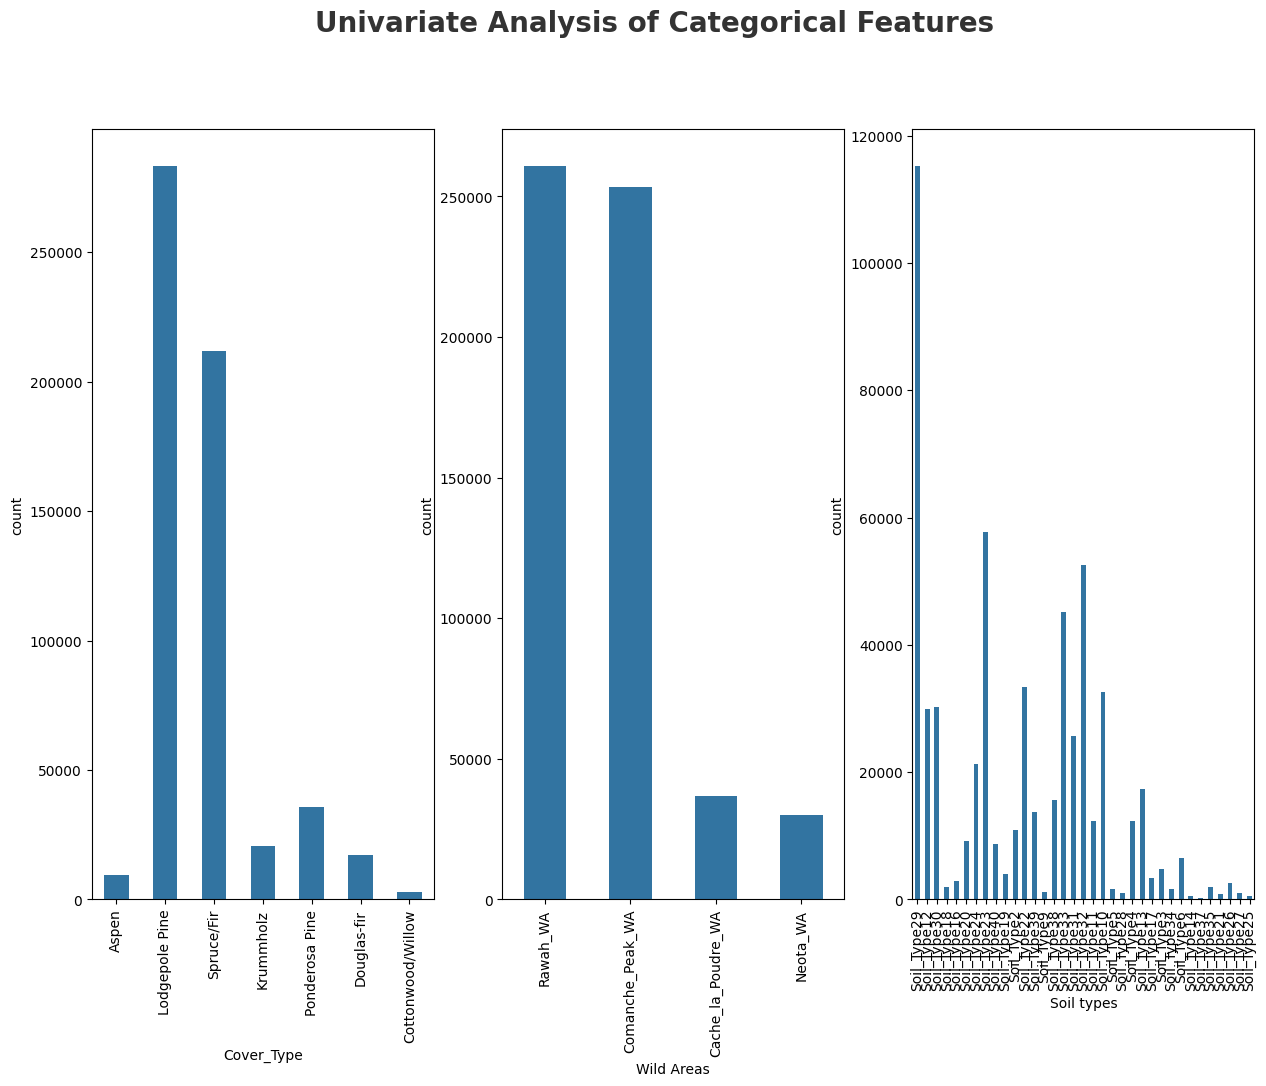

In [43]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(categorical_features)):
  plt.subplot(1,3,i+1)
  sns.countplot(data=df,x=categorical_features[i],width=0.5)
  plt.xlabel(categorical_features[i])
  plt.xticks(rotation=90)

* Multivariate Analysis <br>


Multivariate analysis is the analysis of more than one variable.

In [45]:
discrete_features=[feature for feature in numerical_features if (len(df[feature].unique())<=25 and len(df[feature].unique())>3)]

continuous_features=[feature for feature in numerical_features if len(df[feature].unique()) > 25]

encoded_categorical = [feature for feature in numerical_features if len(df[feature].unique()) <=3]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))
print('\nWe have {} encoded_categorical : {}'.format(len(encoded_categorical), encoded_categorical))


We have 0 discrete features : []

We have 10 continuous_features : ['Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hydrology', 'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'HD_Fire_Points']

We have 0 encoded_categorical : []


In [46]:
categorical_features = categorical_features + encoded_categorical
print(categorical_features)

['Cover_Type', 'Wild Areas', 'Soil types']


Check Multicollinearity in Numerical features

In [48]:
df.corr(numeric_only=True)

,Elevation,Aspect,Slope,HD_Hydrology,VD_Hydrology,HD_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,HD_Fire_Points
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662
HD_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874
VD_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913
HD_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981
HD_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000


Check Multicollinearity in Numerical features using visualization



<Axes: >

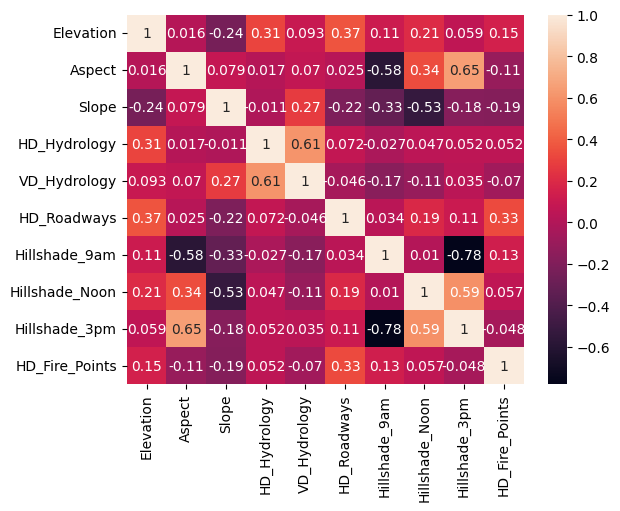

In [53]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

Inferences (Correlated Features)
* Elevation and Horizontal Distance to Roadways.
* Aspect and Hillshade at 9am
* Aspect and Hillshade at 3pm
* Slope and Hillshade at Noon
* Horizontal Distance to hydrology and Vertical Distance to Hydrology
* Hillshade at 9am and Hillshade at 3pm
* Hillshade at 3pm and Hillshade at Noon

Checking Null Values

In [54]:
df.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
HD_Hydrology,0
VD_Hydrology,0
HD_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
HD_Fire_Points,0


Q. How is the data distribution of our target column 'Cover_Type' ?

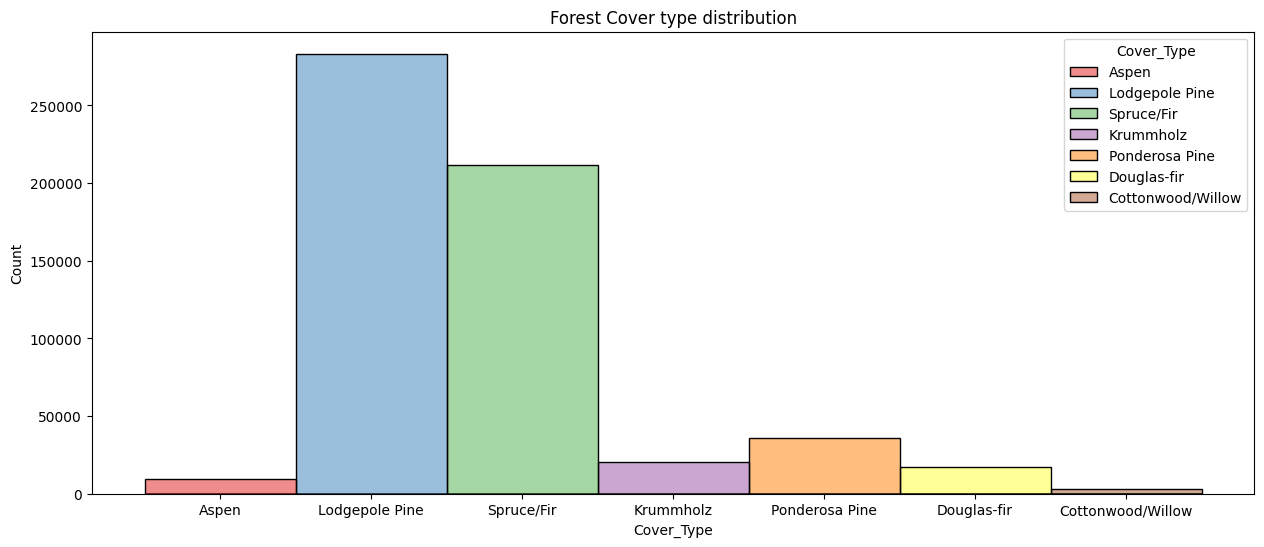

In [55]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x="Cover_Type", hue = 'Cover_Type', palette='Set1')
plt.title('Forest Cover type distribution')
plt.show()

INFERENCE
* we can see 'Lodgepole Pine' has largest forest cover.
* 'Cottonwood/Willow' has lowest forest cover.

Q. Which Wild area has what kind of Forest cover ?

<Axes: xlabel='Wild Areas'>

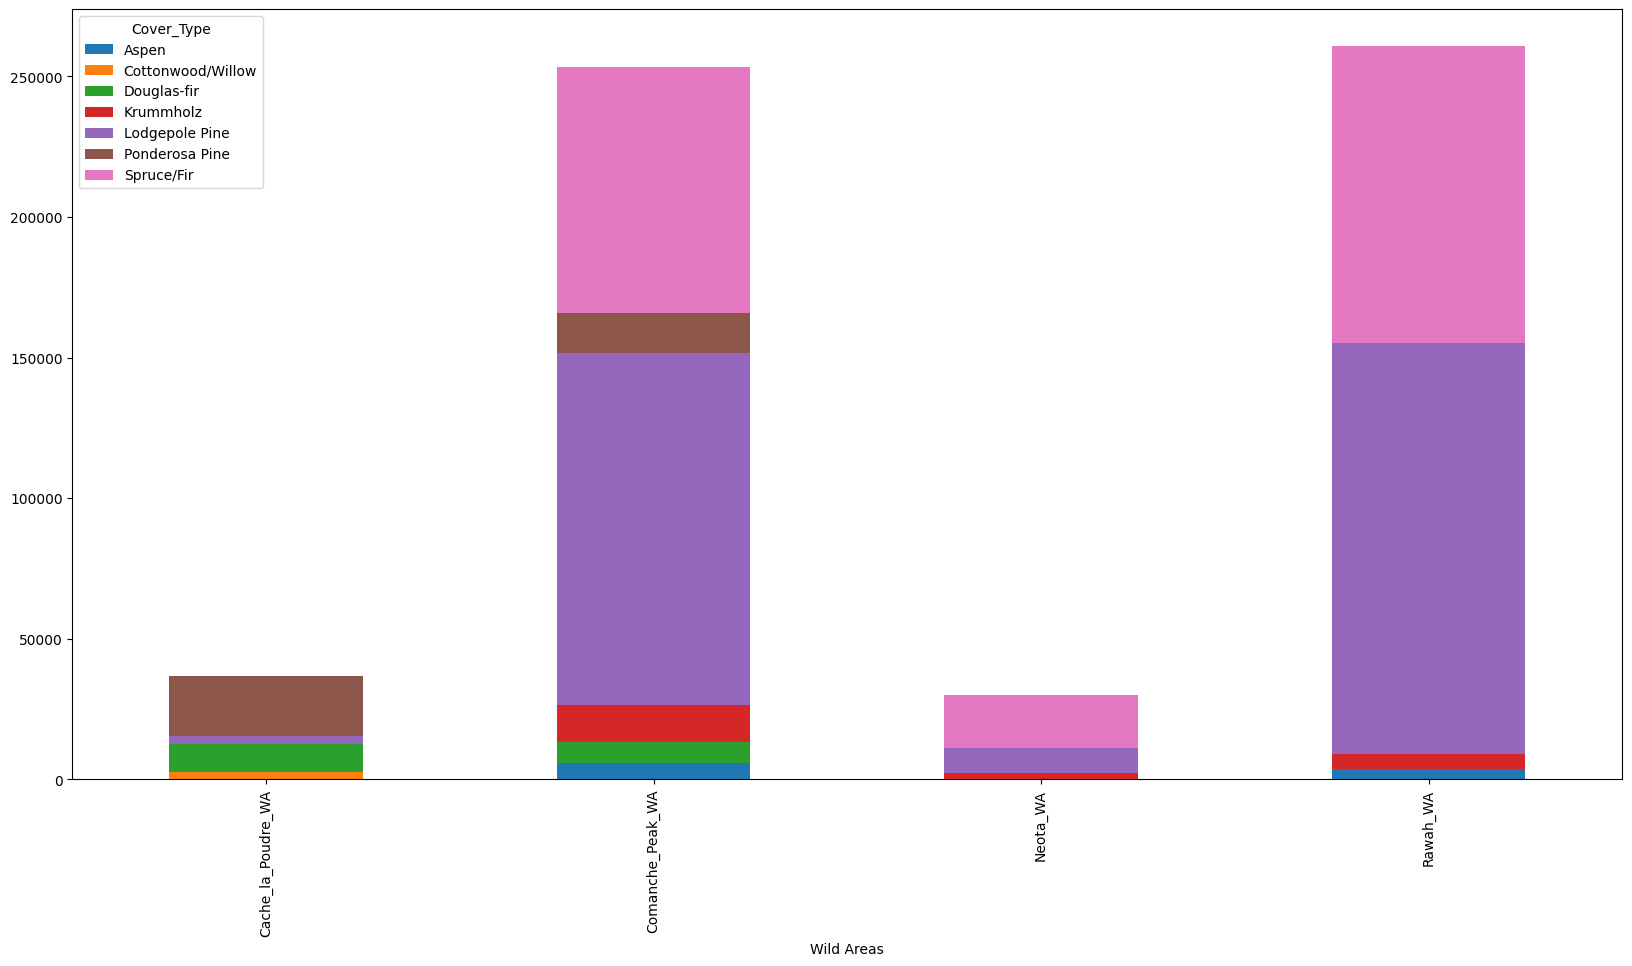

In [61]:
df.groupby(["Wild Areas"])["Cover_Type"].value_counts().unstack().plot(kind="bar",stacked=True,figsize=(20,10))

INFERENCES
* Cache_La_Poudre and Neota Wilderness Areas have same number of forest covers
* Comanche_Peak accounts for 42% of the total Wild Areas data.
* The least data is for Neota Wild Area i.e 3.3% in our data.
* We can also see that none of the wild areas have all the types of forest covers

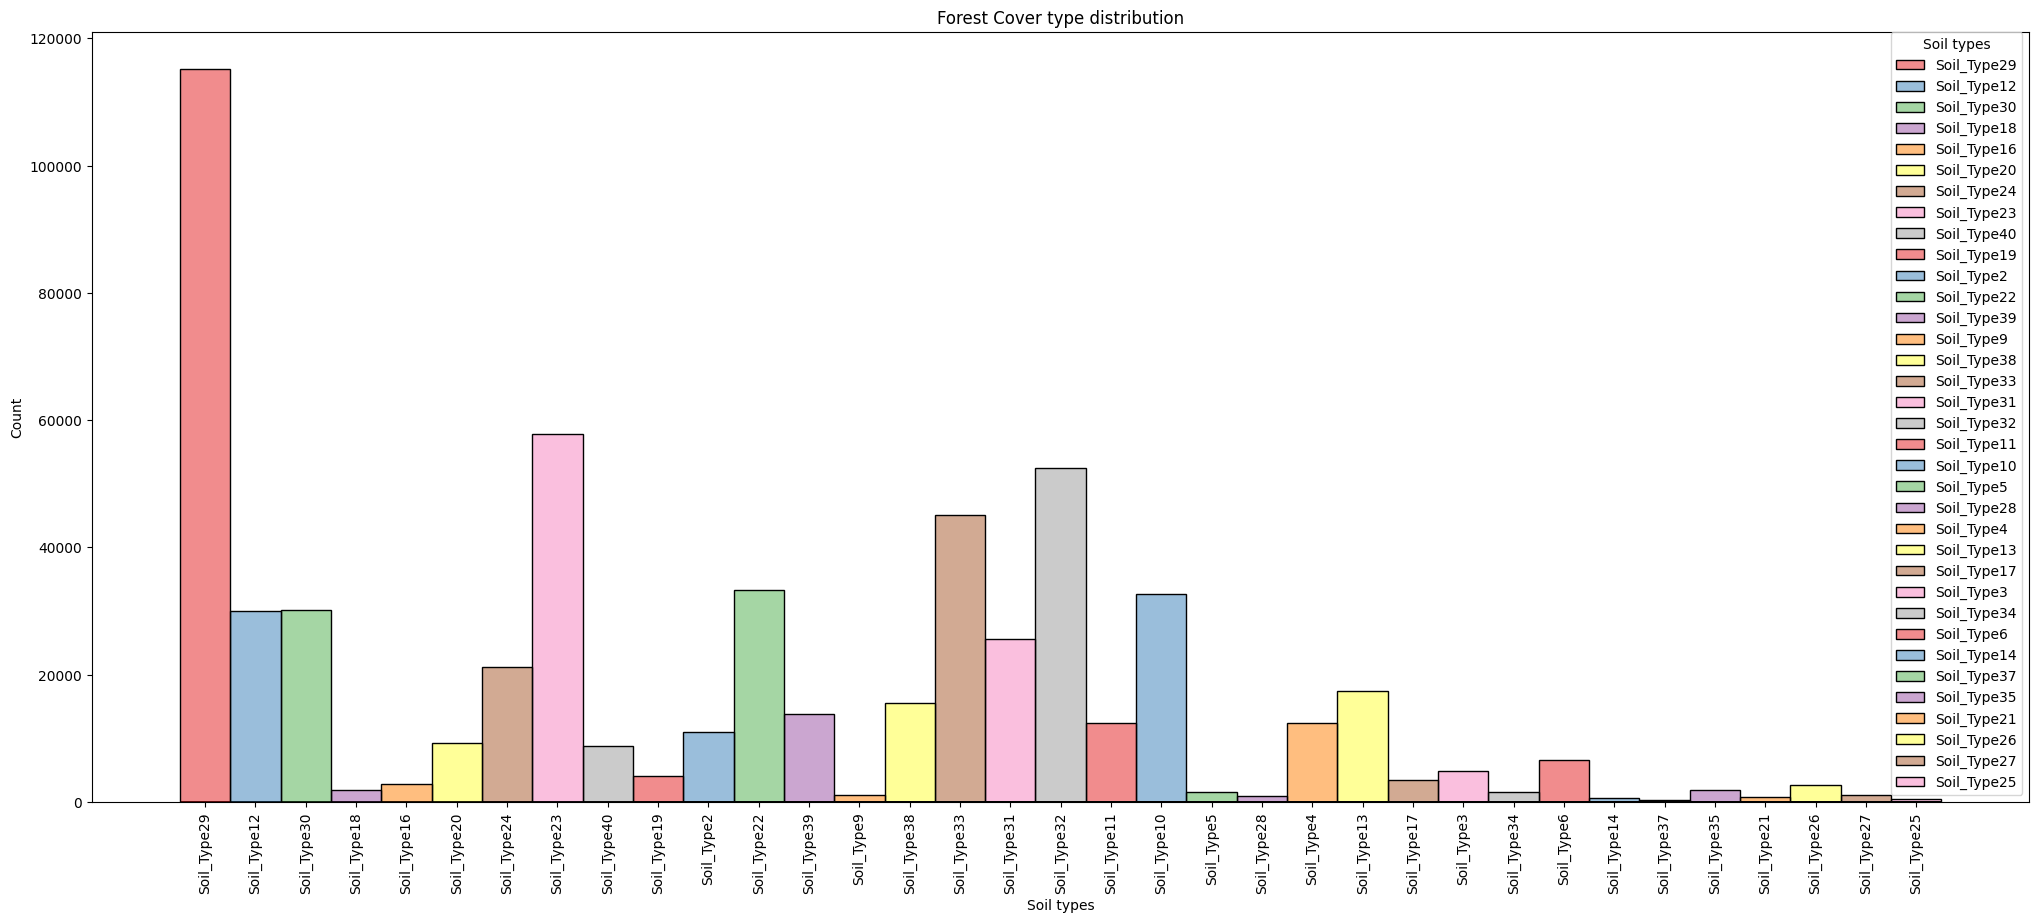

In [62]:
plt.figure(figsize=(25,10))
sns.histplot(data=df, x="Soil types", hue = 'Soil types', palette='Set1')
plt.title('Forest Cover type distribution')
plt.xticks(rotation=90)
plt.show()


INFERENCE
* We have most of the data for soil type 29 and 23.
Many soil types are rare in our data

* Box Plot

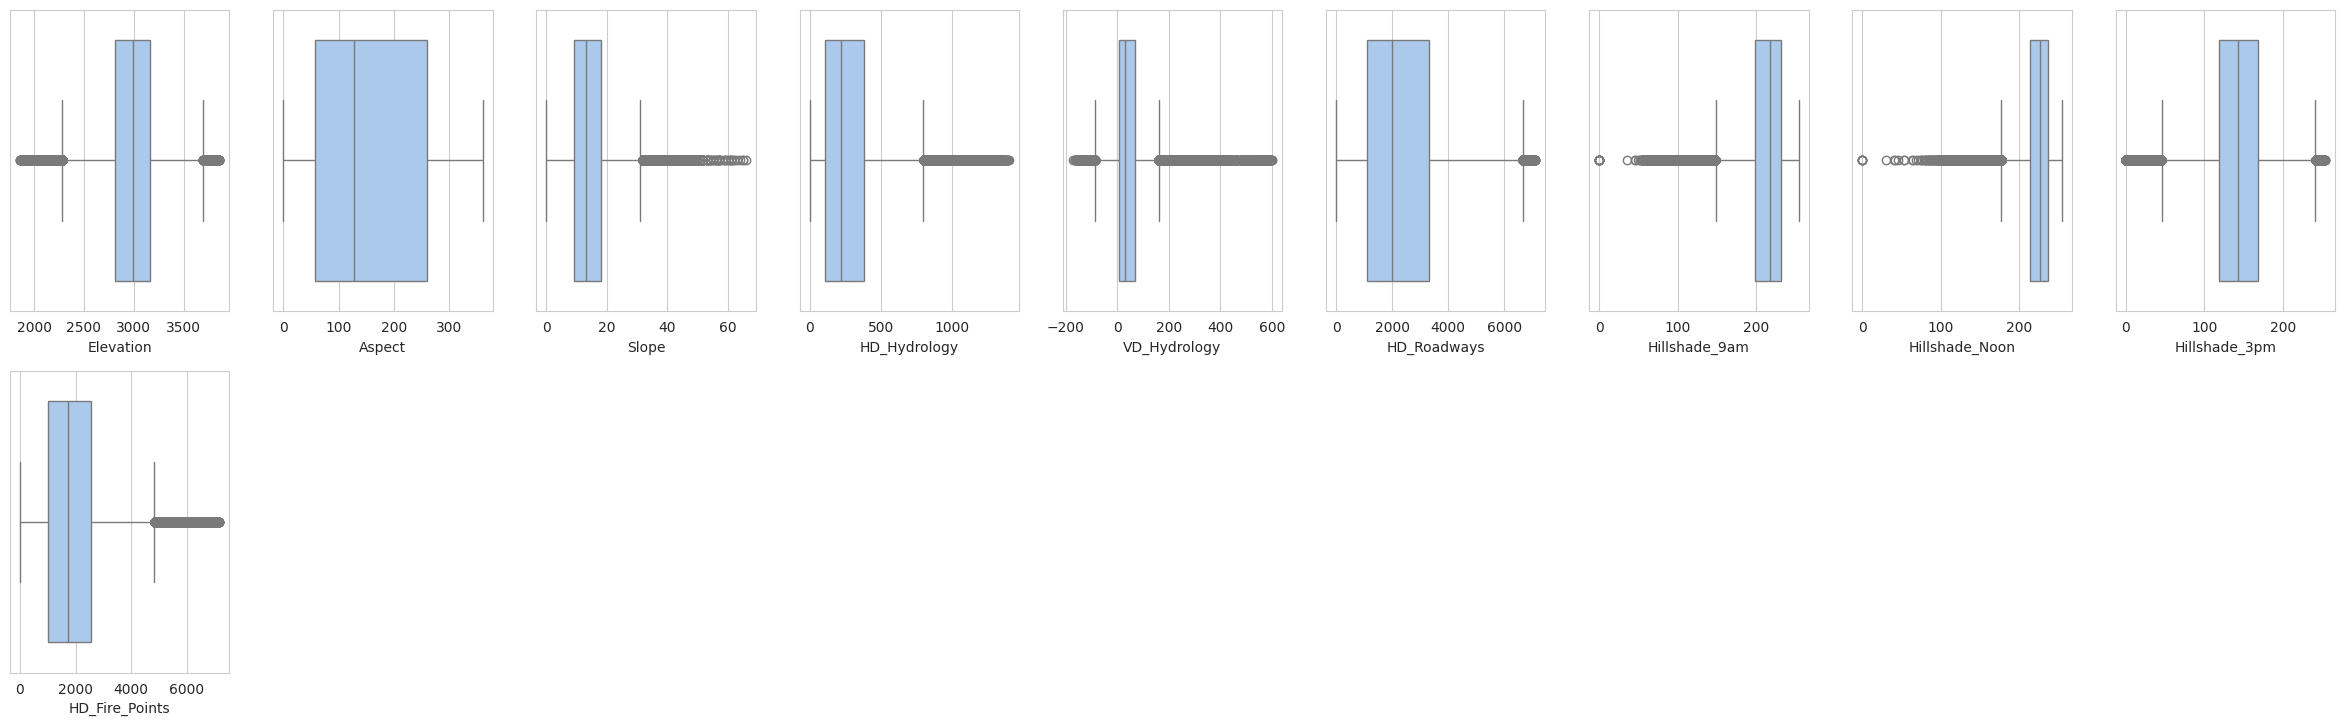

In [64]:
sns.set_style("whitegrid")
color = sns.color_palette('pastel')
plt.figure(figsize=(30,18))
for i,col in enumerate(numerical_features):
    plt.subplot(4,9,i+1)
    sns.boxplot(df[col], orient='h', palette=color)

Inference
* Slope is the most squeezed box plot. It having a least range means that the median and mean will be quite close.
* Aspect features is the only one with little to none outliers.
* Elevation is the only feature that doesn't have a minimum value of 0. It is instead plotted in the middle having many outliers too.
* Horizontal_Distance_To_Roadways has the most spread out data of all features. This is because it has highest standard deviation score. Horizontal_Distance_To_Fire_Points has a similar look, but it has the maximum value.
* If we compare these two features, the last 50% of Horizontal_Distance_To_Roadways is much more spread and less dense compared to Horizontal_Distance_To_Fire_Points, hence having a high standard deviation score.

###**Final Report**
* Forest cover type 'Lodgepole Pine' has largest forest cover and 'Cottonwood/Willow' has lowest forest cover.
* Cache_La_Poudre and Neota Wilderness Areas have same number of forest covers.
* Most of the data is abundant with soil type 29 and 23.
* There is a positive correlation between Elevation and Distance to Roadways.
* There is a negative correlation between hillshade index at 9am and 3pm.
Horizontal_Distance_To_Roadways has the most spread out data of all features.
